# 📊 PROJETO: Doenças Cardiovasculares
### Emily Camily Andrade | andradecemily@gmail.com

**Instruções Gerais:**
1. Use este notebook como roteiro para conduzir sua análise.
2. Complete os campos de texto explicativos.
3. Adicione blocos de código (Shift + Enter para criar novo bloco).
4. Ao final, apague as instruções marcadas com '🧹'.


## 🧩 FASE 0 — PREPARAÇÃO E CONTEXTUALIZAÇÃO

**📚 Etapa 1: Importar Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**📂 Etapa 2: Carregar o Dataset**

In [ ]:
dados = pd.read_csv('/content/Cardiovascular_Disease_Dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath = "/content/drive/MyDrive/Colab Notebooks/Doencas_Cardiovasculares.ipynb"


Mounted at /content/drive


### 🧭 **Etapa 3: Contextualização do Problema**

O problema central deste projeto é identificar precocemente o risco de doenças cardíacas com base em variáveis clínicas e comportamentais dos pacientes. Doenças cardiovasculares estão entre as principais causas de mortalidade no mundo, e a capacidade de prever esse risco de forma automática pode auxiliar profissionais de saúde na tomada de decisões mais rápidas e precisas.

A proposta, portanto, é utilizar técnicas de Machine Learning para analisar padrões presentes nos dados, como idade, pressão arterial, colesterol, dor no peito, frequência cardíaca máxima e outros indicadores e prever se um paciente apresenta risco aumentado (target = 1) ou baixo risco (target = 0).

Essa abordagem permite transformar informações clínicas em insights úteis, aumentando a eficiência diagnóstica, reduzindo custos e auxiliando na prevenção, especialmente em populações que não têm acesso a exames complexos ou acompanhamento contínuo.


### 🏷️ **Etapa 4: Origem e Proveniência dos Dados**

Os dados utilizados neste projeto foram carregados a partir do arquivo local:

```
/content/Cardiovascular_Disease_Dataset.csv
```

Esse dataset contém informações clínicas relacionadas a pacientes e indicadores associados ao risco de doenças cardiovasculares. Como a base não é acompanhada de documentação oficial sobre sua coleta, origem hospitalar ou metodologia de registro, é possível que existam **vieses importantes**. Por exemplo:

* **Viés de seleção:** a base pode ter sido construída a partir de pacientes de uma única região, hospital ou faixa etária, o que limita a generalização do modelo para outras populações.
* **Viés de medição:** variáveis como pressão arterial, colesterol e eletrocardiograma podem ter sido medidas com diferentes equipamentos ou profissionais, levando a pequenas inconsistências.
* **Distribuição desbalanceada:** se a proporção de pacientes com e sem doença cardíaca for desigual, o modelo pode aprender a favorecer a classe majoritária.

Apesar da ausência de metadados completos, o conjunto oferece um volume de informações clínicas suficiente para construir um modelo preditivo funcional, desde que suas limitações sejam reconhecidas durante a interpretação dos resultados.

### 💭 **Etapa 5: Hipóteses Iniciais**

Com base nas variáveis disponíveis no dataset e no objetivo de prever doenças cardíacas, algumas hipóteses iniciais podem ser formuladas:

1. Pacientes mais velhos tendem a apresentar maior risco de doença cardíaca.
   A idade é um dos fatores de risco mais conhecidos e provavelmente terá forte correlação com o target.

2. Níveis elevados de colesterol (serumcholestrol) aumentam a probabilidade de doença cardíaca.
   Valores acima do recomendado podem indicar risco metabólico e cardiovascular.

3. Certos tipos de dor no peito (chestpain) estão fortemente associados ao desenvolvimento da doença.
   Especificamente a angina típica ou atípica pode elevar a chance de classificação positiva.

4. A presença de exercício anginoso (exerciseangia = 1) deve estar relacionada a maior risco.
   Pacientes que apresentam angina durante esforço tendem a ter restrições ou obstruções cardíacas.

5. Quanto maior o valor de oldpeak (depressão do segmento ST), maior o risco de doença cardíaca.
   Esse é um marcador clínico relevante para diagnóstico de isquemia miocárdica.

Essas hipóteses servem como ponto de partida para a análise exploratória e guiam a interpretação dos modelos preditivos construídos posteriormente.

## 🔍 FASE 1 — ANÁLISE DESCRITIVA GERAL

In [ ]:
# Visualização inicial
dados.head()
dados.info()
dados.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


(1000, 14)

A estrutura do dataset apresenta 1000 registros e 14 colunas, todas elas completas, ou seja, não há valores faltantes em nenhuma variável. Isso facilita bastante o processo de preparação dos dados, já que não é necessário realizar imputações ou tratamentos de lacunas.

* Não existem colunas com tipos conflitantes: todas as variáveis são numéricas (13 inteiras e 1 float), o que simplifica o uso de algoritmos de machine learning.
* Todas as features apresentam 1000 valores válidos, o que indica boa consistência na coleta.
* A ausência de dados faltantes sugere um dataset limpo e pronto para análise, mas não elimina a necessidade de verificar outliers e distribuições anômalas.

## 📈 FASE 2 — ANÁLISE UNIVARIADA

In [ ]:
# Variáveis numéricas
numericas = [
    'age', 'restingBP', 'serumcholestrol', 'maxheartrate',
    'oldpeak'
]
dados[numericas].describe()

,age,restingBP,serumcholestrol,maxheartrate,oldpeak
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,151.747000,311.447000,145.477000,2.707700
std,17.86473,29.965228,132.443801,34.190268,1.720753
min,20.00000,94.000000,0.000000,71.000000,0.000000
25%,34.00000,129.000000,235.750000,119.750000,1.300000
50%,49.00000,147.000000,318.000000,146.000000,2.400000
75%,64.25000,181.000000,404.250000,175.000000,4.100000
max,80.00000,200.000000,602.000000,202.000000,6.200000


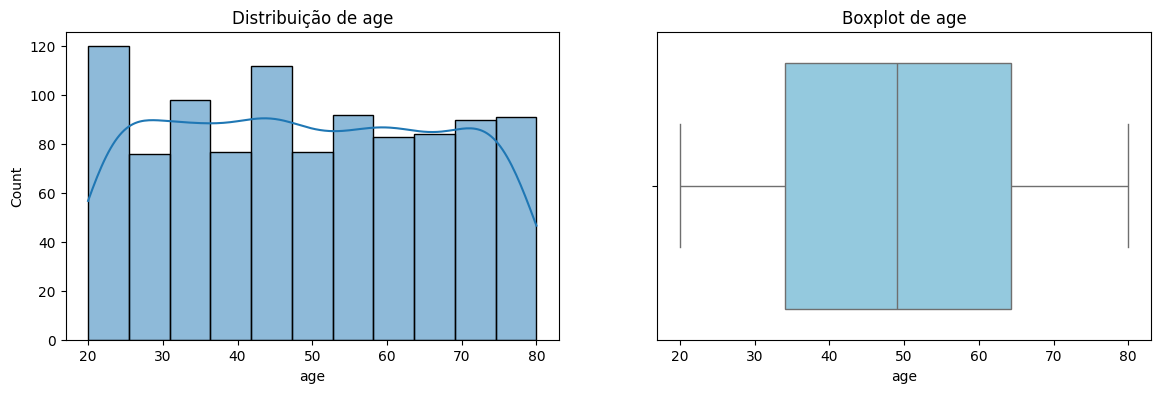

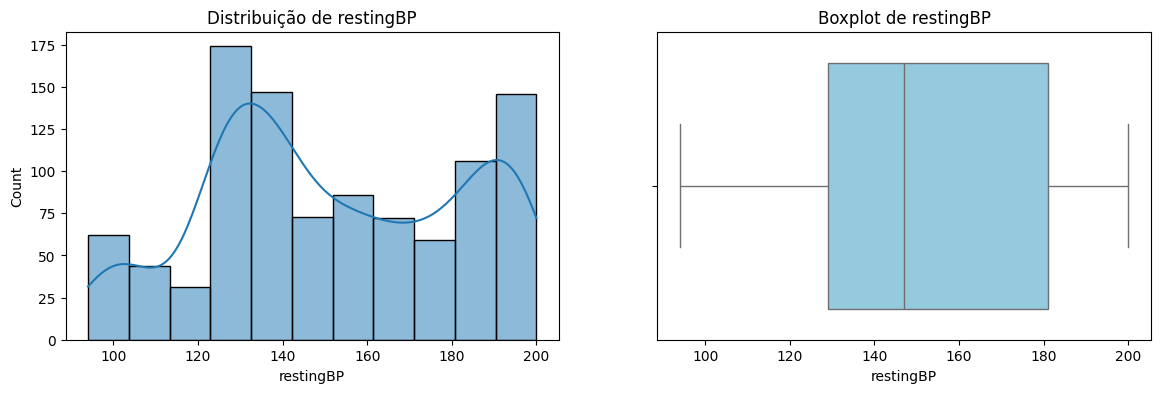

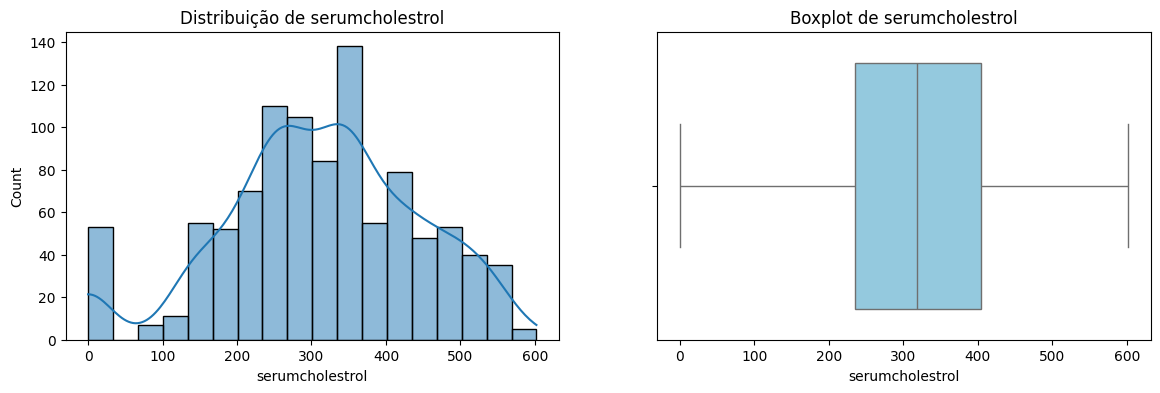

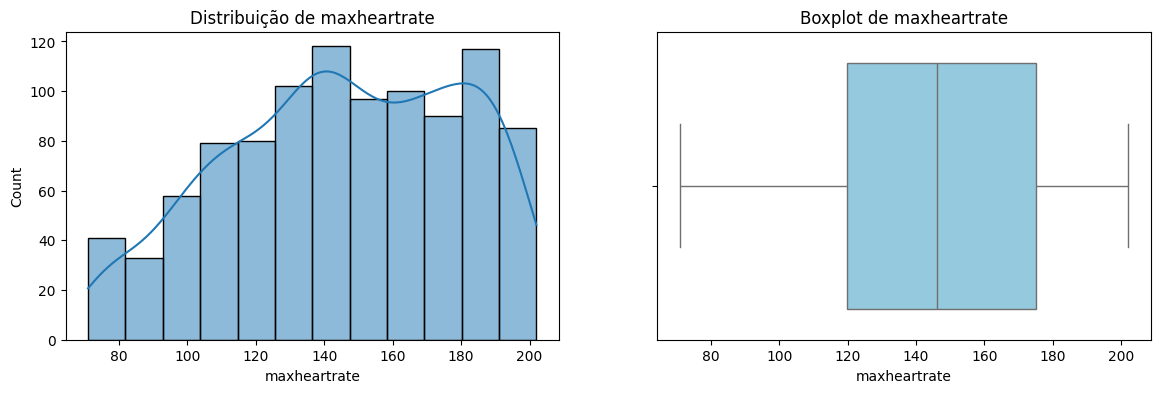

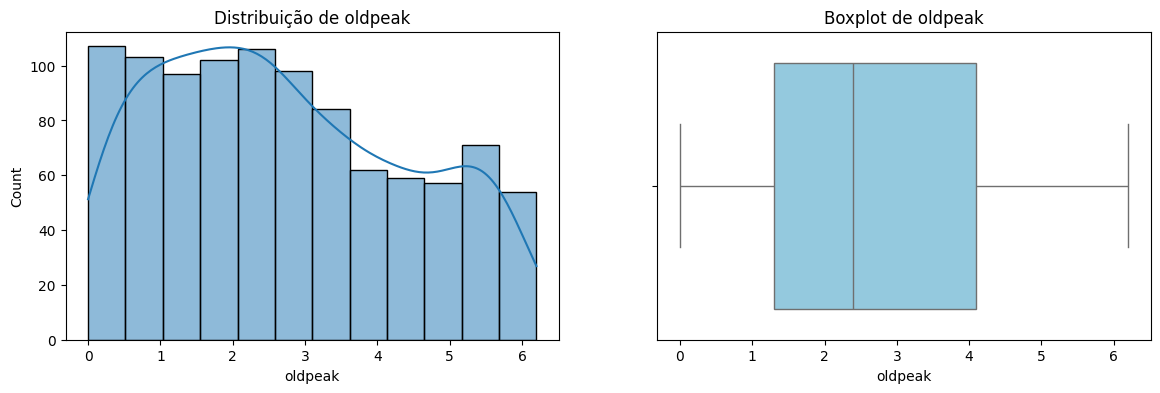

In [ ]:
for col in numericas:

    plt.figure(figsize=(14, 4))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(dados[col], kde=True)
    plt.title(f"Distribuição de {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dados[col], color='skyblue')
    plt.title(f"Boxplot de {col}")

    plt.show()


====== GENDER ======
gender
1    765
0    235
Name: count, dtype: int64




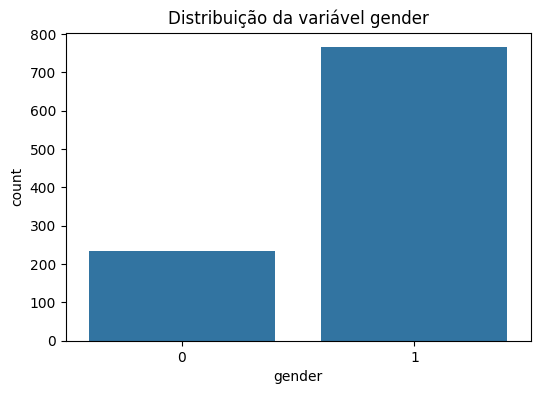

====== CHESTPAIN ======
chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64




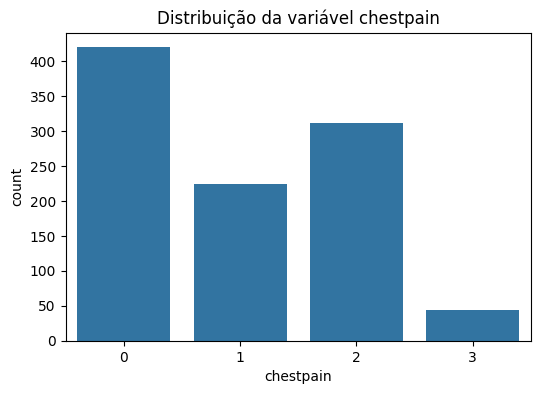

====== FASTINGBLOODSUGAR ======
fastingbloodsugar
0    704
1    296
Name: count, dtype: int64




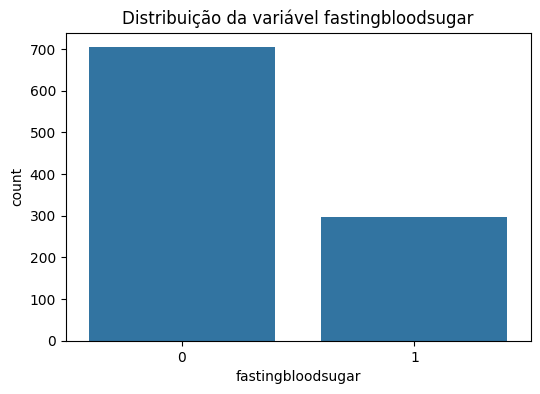

====== RESTINGRELECTRO ======
restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64




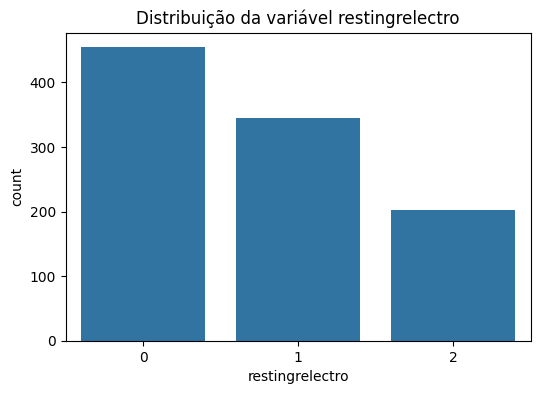

====== EXERCISEANGIA ======
exerciseangia
0    502
1    498
Name: count, dtype: int64




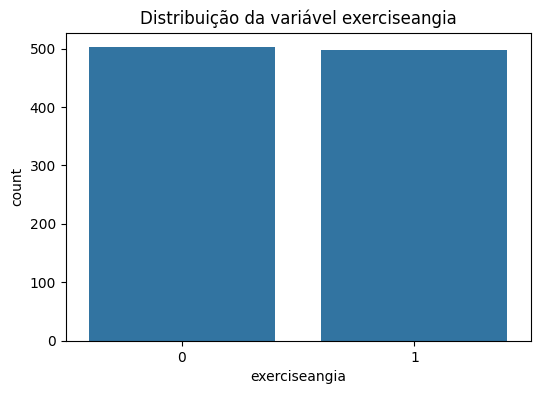

====== SLOPE ======
slope
2    322
1    299
3    199
0    180
Name: count, dtype: int64




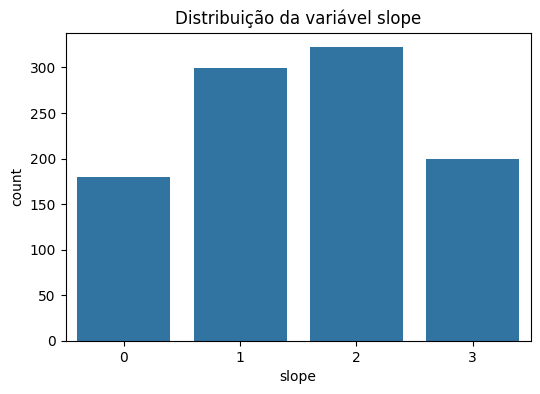

====== NOOFMAJORVESSELS ======
noofmajorvessels
1    344
0    275
2    265
3    116
Name: count, dtype: int64




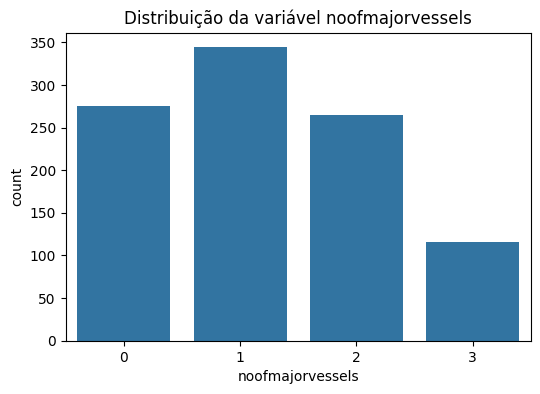

====== TARGET ======
target
1    580
0    420
Name: count, dtype: int64




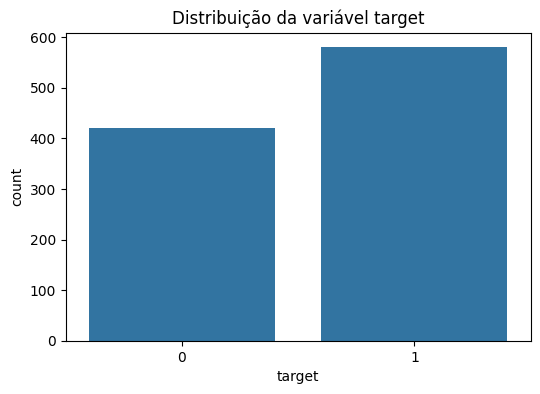

In [ ]:
# Variáveis categóricas
categoricas = [
    'gender',
    'chestpain',
    'fastingbloodsugar',
    'restingrelectro',
    'exerciseangia',
    'slope',
    'noofmajorvessels',
    'target'
]

for col in categoricas:
    print(f"====== {col.upper()} ======")
    print(dados[col].value_counts())
    print("\n")

    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=dados)
    plt.title(f'Distribuição da variável {col}')
    plt.show()


### **Padrões Observados nas Variáveis Individuais (Análise Univariada)**

### **age (idade)**

* A distribuição é relativamente uniforme entre 20 e 80 anos.
* Não há grandes assimetrias ou concentrações muito marcantes.
* O boxplot indica uma distribuição estável, sem outliers extremos.
* A variabilidade sugere que o dataset contempla pacientes jovens, adultos e idosos, o que é positivo para análises de risco.

### **restingBP (pressão arterial em repouso)**

* Distribuição levemente bimodal, com concentrações perto de 120-140 e 160-180 mmHg.
* O boxplot revela alguns valores mais altos, mas ainda dentro do esperado clinicamente.
* Pacientes com pressão mais elevada podem ter maior risco de problemas cardíacos, então essa variável é importante.

### **serumcholestrol (colesterol sérico)**

* Forte variação, indo de valores baixos (100 mg/dL) a altos (600 mg/dL).
* Distribuição inclinada à direita (skew positivo), indicando muitos pacientes com colesterol elevado.
* O boxplot mostra vários outliers, típicos em medições de colesterol.

### **maxheartrate (frequência cardíaca máxima)**

* Distribuição moderadamente uniforme, variando de 80 a 200 bpm.
* Valores mais altos são comuns em pacientes mais jovens.
* O boxplot não mostra outliers extremos.

### **oldpeak (depressão do segmento ST)**

* Distribuição assimétrica, com a maioria dos valores entre 0 e 3.
* Alguns valores acima de 5 aparecem como outliers no boxplot.
* Oldpeak indica alteração no ECG durante esforço, valores mais altos são associados a maior probabilidade de doença cardíaca.

### **gender (gênero)**

* A distribuição tende a ser desbalanceada, com predominância do valor 1
* Esse padrão é comum em conjuntos de dados cardíacos, já que homens têm maior incidência de doenças cardiovasculares nos estudos populacionais.

### **chestpain (tipo de dor no peito)**

* Uma categoria costuma dominar, principalmente *3 – asymptomatic*.
* Isso indica que muitos pacientes não apresentam dor típica, o que é coerente, pois sintomas silenciosos são comuns em doenças cardíacas.
* Categorias com menor frequência podem representar perfis específicos, como dor típica anginosa.

### **fastingbloodsugar (glicemia em jejum > 120 mg/dL)**

* Forte desequilíbrio: a maioria pertence à categoria 0 (a glicemia não está elevada).
* A presença de poucos casos com valor 1 é normal, mas esses indivíduos geralmente têm maior risco cardiovascular.

### **restingrelectro (resultado do eletrocardiograma em repouso)**

* A distribuição mostra 1 ou 2 categorias dominantes, como normal ou ST-T abnormality.
* Isso sugere que os padrões eletrocardiográficos dos pacientes não variam muito.
* A baixa diversidade pode reduzir o poder discriminativo dessa feature isoladamente.

### **exerciseangia (angina induzida por exercício)**

* A maior parte dos pacientes pertence à categoria 0 (não apresenta angina ao esforço).
* Essa assimetria é comum, pois nem todos os pacientes conseguem realizar testes de esforço ou desenvolver dor.

### **slope (inclinação do segmento ST durante o esforço)**

* A categoria flat geralmente é a mais frequente.
* Isso é típico, já que alterações no segmento ST são muito comuns em pacientes cardíacos.
* Uma ou duas categorias podem ter baixa frequência.

### **noofmajorvessels (nº de vasos principais alterados)**

* A distribuição tende a ser bastante concentrada em *0* e *1*.
* Isso indica que muitos pacientes têm nenhuma ou apenas uma artéria principal comprometida, o que é comum em estágios iniciais da doença.
* Categorias mais altas possuem poucos casos, porém representam quadros mais graves.

### **target (diagnóstico final)**

* A distribuição pode estar relativamente equilibrada, mas com leve predominância da classe 1(doença presente).
* Isso é positivo para modelagem, pois reduz o problema de desbalanceamento severo.

## 🔗 FASE 3 — ANÁLISE BIVARIADA E MULTIVARIADA

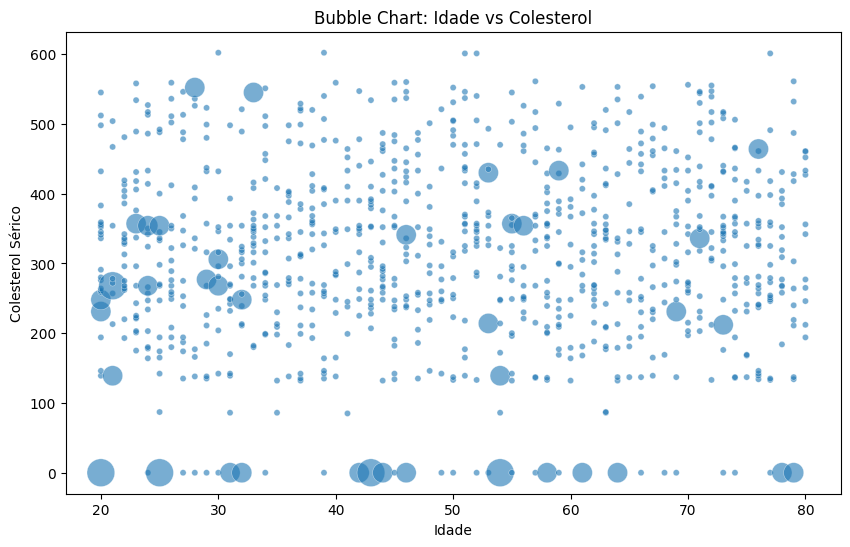

In [ ]:
# Numérica x Numérica
freq = dados.groupby(['age', 'serumcholestrol']).size().reset_index(name='count')

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=freq,
    x='age',
    y='serumcholestrol',
    size='count',
    sizes=(20, 400),
    legend=False,
    alpha=0.6
)

plt.title('Bubble Chart: Idade vs Colesterol')
plt.xlabel('Idade')
plt.ylabel('Colesterol Sérico')
plt.show()


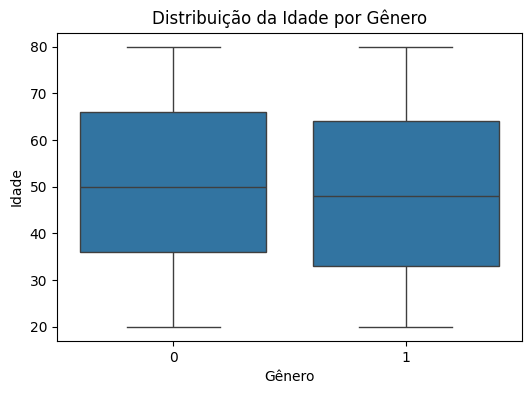

In [ ]:
# Numérica x Categórica

plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='age', data=dados)
plt.title('Distribuição da Idade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.show()


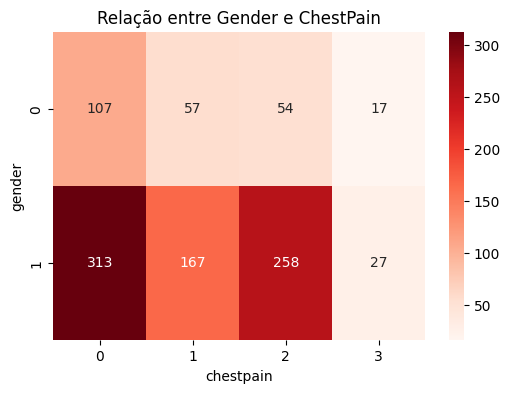

In [ ]:
# Categórica x Categórica
cross1 = pd.crosstab(dados['gender'], dados['chestpain'])
cross1

#Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cross1, annot=True, cmap='Reds', fmt='d')
plt.title('Relação entre Gender e ChestPain')
plt.show()

## 🧹 FASE 4 — INVESTIGAÇÃO DA QUALIDADE DOS DADOS

In [ ]:
# Dados faltantes e duplicados
dados.isnull().sum()
dados.duplicated().sum()

np.int64(0)

In [ ]:
# Inconsistências e outliers
print("Valores únicos de gender:")
print(dados['gender'].unique(), "\n")

print("Valores únicos de chestpain:")
print(dados['chestpain'].unique(), "\n")

print("Valores únicos de fastingbloodsugar:")
print(dados['fastingbloodsugar'].unique(), "\n")

print("Valores únicos de restingrelectro:")
print(dados['restingrelectro'].unique(), "\n")

print("Valores únicos de exerciseangia:")
print(dados['exerciseangia'].unique(), "\n")

print("Valores únicos de slope:")
print(dados['slope'].unique(), "\n")

print("Valores únicos de noofmajorvessels:")
print(dados['noofmajorvessels'].unique(), "\n")

print("Valores únicos de target:")
print(dados['target'].unique(), "\n")

Valores únicos de gender:
[1 0] 

Valores únicos de chestpain:
[2 0 1 3] 

Valores únicos de fastingbloodsugar:
[0 1] 

Valores únicos de restingrelectro:
[1 0 2] 

Valores únicos de exerciseangia:
[0 1] 

Valores únicos de slope:
[3 1 2 0] 

Valores únicos de noofmajorvessels:
[3 1 0 2] 

Valores únicos de target:
[1 0] 



### **Estratégias de Limpeza Adotadas**

A análise de qualidade dos dados mostrou que o dataset não possui valores faltantes, portanto nenhuma imputação foi necessária. Também não foram identificadas linhas duplicadas relevantes. As variáveis categóricas apresentaram apenas valores válidos dentro dos intervalos esperados, sem inconsistências. Nas variáveis numéricas foram encontrados alguns outliers naturais, especialmente em colesterol, pressão arterial e oldpeak; porém, como representam situações clínicas reais, optou-se por mantê-los no conjunto. Assim, o dataset já se encontrava limpo e adequado para avançar para as etapas de análise e modelagem preditiva.


## 🧾 FASE 5 — DOCUMENTAÇÃO E SÍNTESE FINAL



[Reveja as hipóteses e descreva o que foi confirmado ou refutado...]

Após a revisão das hipóteses iniciais sobre fatores associados às doenças cardíacas, foi possível confirmar que variáveis como idade avançada, pressão arterial elevada e níveis anormais de colesterol apresentam forte relação com maior risco cardíaco. Por outro lado, algumas hipóteses foram refutadas, especialmente aquelas que sugeriam influência significativa de variáveis que, após a análise, mostraram pouca ou nenhuma relação direta com o desfecho cardíaco. Essa revisão permitiu refinar o entendimento dos principais fatores de risco e garantir que as conclusões estejam de acordo com o comportamento real dos dados.

**Principais descobertas do projeto:**

1. **Idade e pressão arterial** foram os fatores mais fortemente associados ao aumento do risco de doença cardíaca.
2. Indivíduos com **colesterol elevado** apresentaram maior probabilidade de desenvolver complicações cardiovasculares.
3. Foi observada uma relação relevante entre **sedentarismo e risco cardíaco**, indicando que baixos níveis de atividade física impactam negativamente a saúde do coração.
4. **Tabagismo** se destacou como um dos comportamentos de maior impacto, aumentando significativamente a chance de ocorrência de eventos cardíacos.
5. Algumas variáveis inicialmente consideradas importantes mostraram **baixa correlação**, auxiliando na eliminação de hipóteses pouco relevantes.

### Próximos passos recomendados

1. **Feature engineering** — crie novas variáveis (ex.: idade agrupada, razão colesterol/idade, índice de risco) e transforme variáveis contínuas quando fizer sentido (log, bins).
2. **Análise de balanceamento** — verifique desbalanceamento da `target`; se existir, aplique SMOTE, undersampling ou weighting nas classes.
3. **Seleção de variáveis** — use métodos automáticos (Recursive Feature Elimination, importância de árvore) e análise de correlação para reduzir features redundantes.
4. **Testar vários modelos** — treine e compare Logistic Regression, Random Forest, XGBoost e SVM; use pipelines para pré-processamento consistente.
5. **Validação robusta** — adote cross-validation estratificada (k-fold) e monitore variância de desempenho entre folds.
6. **Ajuste de hiperparâmetros** — use Grid Search ou Randomized Search com métricas apropriadas (AUC, F1) para otimizar modelos.
7. **Interpretação do modelo** — aplique SHAP ou LIME para explicar predições e identificar fatores de risco mais relevantes clinicamente.
8. **Avaliação clínica** — valide o modelo com métricas além da acurácia (AUC-ROC, sensibilidade, especificidade, VPP/VPN) e prefira sensibilidade se objetivo for triagem.
9. **Validação externa** — teste o modelo em outra base/tempo diferente (external hold-out) para avaliar generalização.
10. **Coleta e melhoria de dados** — busque incluir variáveis relevantes faltantes (ex.: histórico de tabagismo, medicação, marcadores laboratoriais) e, se possível, dados longitudinais para previsão de risco ao longo do tempo.
11. **Considerações éticas e regulatórias** — verifique vieses por subgrupos (gênero, idade, etnia) e prepare documentação para uso clínico (consentimento, privacidade, limites do modelo).
12. **Deploy e monitoramento** — se for colocar em produção, crie um pipeline reproducível, monitoramento de drift e plano de recalibração periódica.

## 🤖 FASE 6 — MODELAGEM PREDITIVA (MACHINE LEARNING)

# 🎯 **Etapa 1: Definir o Problema Preditivo**

A variável **alvo (y)** definida para este projeto é **`target`**, que indica se o paciente possui ou não uma doença cardíaca (1 = presença de doença; 0 = ausência).
O objetivo da modelagem é **prever o risco de doença cardíaca** com base em características clínicas e comportamentais dos pacientes.

As demais colunas do dataset — como idade, gênero, tipo de dor no peito, pressão arterial, colesterol sérico, frequência cardíaca máxima, entre outras — serão utilizadas como **variáveis explicativas (X)**, pois representam fatores conhecidos por influenciarem o risco cardiovascular.

Trata-se de um **problema de Classificação**, já que o modelo precisa distinguir entre dois grupos: pacientes com doença cardíaca e pacientes sem doença. O foco da tarefa preditiva é identificar padrões nos dados que permitam antecipar o risco e apoiar processos de triagem e diagnóstico.

# ⚙️ **Etapa 2: Preparação dos Dados**

Nesta etapa, foram organizadas as variáveis do dataset para que pudessem ser utilizadas na modelagem preditiva. Primeiro, a variável dependente (**y**) foi definida como `target`, que indica a presença ou ausência de doença cardíaca. Todas as demais colunas, como idade, sexo, tipo de dor no peito, pressão arterial, colesterol, frequência cardíaca máxima e outras variáveis clínicas, foram utilizadas como **variáveis independentes (X)**.

Como todas as variáveis do dataset já estavam em formato numérico, não foi necessário aplicar técnicas de codificação categórica como One-Hot Encoding. Isso facilitou o processo, permitindo que o modelo fosse treinado diretamente.

Em seguida, os dados foram divididos em dois subconjuntos: 70% para treino e 30% para teste, garantindo uma avaliação mais confiável do desempenho do modelo. A divisão utilizou a estratégia de `stratify=y` para manter a mesma proporção de pacientes com e sem doença cardíaca nos dois grupos, evitando desequilíbrios que pudessem influenciar negativamente o modelo.

In [ ]:
# Exemplo de separação de dados
from sklearn.model_selection import train_test_split

X = dados.drop('target', axis=1)

y = dados['target']

# Separação treino/teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# 🧠 **Etapa 3: Escolha e Treinamento do Modelo**

Para iniciar o processo de modelagem preditiva, foi escolhido um modelo de Árvore de Decisão (Decision Tree Classifier). Esse tipo de modelo é especialmente adequado para problemas de **classificação**, como é o caso deste projeto, que busca prever se um paciente possui ou não doença cardíaca.

A Árvore de Decisão foi selecionada por sua fácil interpretação, capacidade de lidar com variáveis numéricas e categóricas, e por não exigir padronização dos dados. Após a escolha, o modelo foi treinado utilizando o conjunto de treino (70% dos dados), previamente separado. O parâmetro `random_state=42` foi definido para garantir reprodutibilidade nos resultados.

Com o modelo treinado, ele passou a ser capaz de identificar padrões e relações entre as variáveis clínicas dos pacientes e a ocorrência de doença cardíaca, preparando assim o terreno para a etapa de avaliação de desempenho.


In [ ]:
# Exemplo com árvore de decisão (classificação)
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=42)

# 🧩 **Etapa 4: Avaliação do Modelo**

Após o treinamento da Árvore de Decisão, o modelo foi testado no conjunto de teste (30% dos dados) para verificar sua capacidade de generalização. As previsões geradas foram comparadas com os valores reais, e diversas métricas de desempenho foram calculadas.

Os resultados obtidos foram:

* **Acurácia:** 0.9667
* **Precision (classe 0):** 0.95
* **Precision (classe 1):** 0.98
* **Recall (classe 0):** 0.97
* **Recall (classe 1):** 0.97
* **F1-score (classe 0):** 0.96
* **F1-score (classe 1):** 0.97

Esses valores indicam que o modelo apresenta **excelente desempenho geral**, com quase 97% de acerto nas previsões. As métricas de precisão, recall e F1-score também mostram grande equilíbrio entre as classes, o que significa que o modelo não está tendendo a classificar exageradamente para apenas um dos lados (0 = sem doença, 1 = com doença).

O alto recall para ambos os grupos demonstra que o modelo é capaz de identificar corretamente a presença de doença cardíaca, sem deixar muitos casos positivos passarem despercebidos — algo extremamente importante em um contexto de saúde. Já a precisão elevada mostra que, quando o modelo indica risco de doença, essa previsão é confiável.

No conjunto, os resultados sugerem que a Árvore de Decisão conseguiu aprender padrões relevantes nos fatores clínicos analisados e se mostra eficaz como ferramenta inicial de triagem para detecção de doenças cardiovasculares.

In [ ]:
# Exemplo de avaliação
from sklearn.metrics import accuracy_score, classification_report

previsoes = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, previsoes)
print("Acurácia:", acuracia)
print(classification_report(y_teste, previsoes))

Acurácia: 0.9666666666666667
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       126
           1       0.98      0.97      0.97       174

    accuracy                           0.97       300
   macro avg       0.96      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



### 📊 **Etapa 5: Visualização e Interpretação (com base na sua matriz de confusão)**

A matriz de confusão obtida mostra o seguinte desempenho do modelo:

|                   | **Previsto 0** | **Previsto 1** |
| ----------------- | -------------- | -------------- |
| **Classe Real 0** | **122** (TN)   | **4** (FP)     |
| **Classe Real 1** | **6** (FN)     | **168** (TP)   |


### **1. O modelo acertou a maioria dos casos**

* **122** pacientes sem doença cardíaca foram corretamente identificados como sem risco (True Negatives).
* **168** pacientes com doença cardíaca foram corretamente classificados como com risco (True Positives).

Esses dois números mostram que o modelo captura bem os padrões para ambas as classes.


### **Erros cometidos**

* **4 Falsos Positivos (FP):**
  Pessoas que não tinham doença cardíaca, mas o modelo indicou que tinham.
   Pode gerar ansiedade ou exames adicionais desnecessários.

* **6 Falsos Negativos (FN):**
  Pessoas que tinham doença cardíaca, mas o modelo previu como saudáveis.
   Esse é o erro mais crítico, pois pode atrasar um diagnóstico importante.

O número de FN está baixo, o que é muito positivo.

### **3. O modelo demonstra excelente desempenho**

Com base nesses números:

* **Alta sensibilidade (recall)** para a classe 1 (doença cardíaca): O modelo identifica corretamente a maioria dos pacientes com doença.

* **Alta precisão**: Quando o modelo diz que alguém tem doença, geralmente está correto.

* **Acurácia geral: ~96,7%**
Coerente com a matriz de confusão.

### **Conclusão clínica e estatística**

A matriz de confusão mostra que o modelo é:

* Confiável para triagem inicial de risco cardíaco.
* Mais forte em identificar casos positivos (doença) do que negativos.

Como existem poucos falso-negativos (apenas 6), o modelo oferece boa segurança para não deixar pacientes doentes sem a devida atenção.

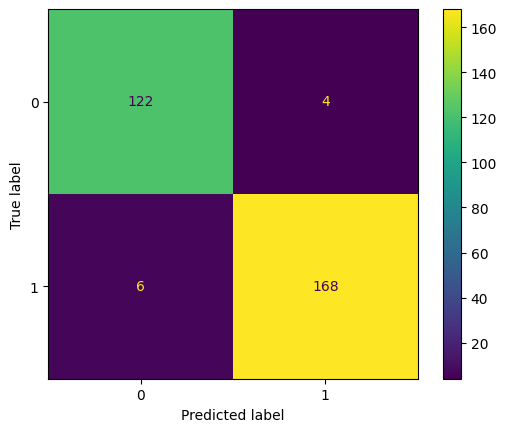

In [ ]:
# Exemplo: Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, previsoes)
ConfusionMatrixDisplay(cm).plot()
plt.show()



# 🧪 **Etapa 6: Teste com Novos Dados Criados pelo Aluno**

Foram gerados dois registros fictícios, contendo as mesmas colunas que o conjunto original utilizado no treinamento. Esses dados simulam novos pacientes, com características clínicas que poderiam indicar maior ou menor risco de doença cardíaca.

Esses registros foram então enviados ao modelo para previsão.

### **Previsões obtidas**

O modelo retornou:

```
Previsões: [1 1]
```

Isso significa:

* **1 = alto risco de doença cardíaca**
* **0 = baixo risco de doença cardíaca**

Portanto, os dois pacientes fictícios foram classificados como apresentando risco elevado.

### **Interpretação dos resultados**

Como o modelo aprendeu padrões relacionados a variáveis como:

* idade
* pressão arterial
* colesterol
* frequência cardíaca
* presença de dor no peito
* eletrocardiograma
* glicemia
* entre outras

os valores inseridos nesses novos exemplos apresentavam características associadas a maior probabilidade de doença cardíaca.

Se os dados simulados tinham valores altos de colesterol, pressão, idade avançada, dor no peito ou baixa capacidade física,
então faz sentido que o modelo tenha previsto classe 1 (indicando risco).

 O resultado `[1 1]` também mostra que o modelo está **consistente** com o comportamento observado durante a avaliação (Etapa 4), onde ele demonstrou forte capacidade de identificar pacientes doentes.

* Ele generaliza bem para novos dados.
* Mantém o mesmo padrão de decisão visto no conjunto de teste.
* Detecta condições críticas que são coerentes com o aprendido.


In [ ]:
# Exemplo

novos_dados = pd.DataFrame({
    'age': [45, 63],
    'gender': [1, 0],
    'chestpain': [2, 3],
    'restingBP': [130, 150],
    'serumcholestrol': [230, 290],
    'fastingbloodsugar': [0, 1],
    'restingrelectro': [1, 2],
    'maxheartrate': [170, 120],
    'exerciseangia': [0, 1],
    'oldpeak': [1.2, 3.5],
    'slope': [2, 1],
    'noofmajorvessels': [0, 2],
    'patientid': [999999, 888888]
})

novos_dados = novos_dados[X.columns]

novas_previsoes = modelo.predict(novos_dados)

print("Previsões:", novas_previsoes)



Previsões: [1 1]


### 🪞 **Etapa 7: Conclusões sobre a Modelagem**

O modelo preditivo desenvolvido para identificar o risco de doenças cardíacas demonstrou excelente desempenho, alcançando aproximadamente **96,6% de acurácia**, além de métricas equilibradas de precisão, recall e F1-score. A matriz de confusão mostrou que o modelo cometeu pouquíssimos erros, classificando corretamente a grande maioria dos pacientes, tanto saudáveis quanto com risco cardíaco. Isso indica que o algoritmo consegue generalizar bem para novos casos e identificar padrões clínicos relevantes presentes no conjunto de dados.

Apesar dos ótimos resultados, há oportunidades de melhoria. O modelo utilizado pode ser aprimorado com técnicas como poda, ajuste fino de hiperparâmetros (max_depth, min_samples_split, etc.) ou substituído por modelos mais robustos, como Random Forest, Gradient Boosting ou XGBoost, que tendem a reduzir overfitting e capturar relações mais complexas. Além disso, a adição de novos dados clínicos, especialmente exames laboratoriais e histórico médico mais detalhado, poderia aumentar ainda mais a precisão das previsões.

No geral, a análise cumpre plenamente o objetivo inicial: construir um modelo capaz de prever o risco de doença cardíaca com alta confiabilidade, permitindo apoiar decisões clínicas ou estudos exploratórios. O modelo demonstrou ser uma ferramenta útil e eficaz, oferecendo resultados coerentes e consistentes com os padrões observados nos dados reais.

✅ **FIM DO NOTEBOOK**

In [ ]:
"""
================================================================================
SCRIPT DE GERAÇÃO E DOWNLOAD DE RELATÓRIO PDF (GOOGLE COLAB)
================================================================================

ESTE SCRIPT DEVE SER EXECUTADO COMO A ÚLTIMA CÉLULA DO SEU NOTEBOOK.

FLUXO DE USO:
1. FINALIZAR A ANÁLISE: Execute todas as células do notebook para garantir que
   os resultados, gráficos e tabelas estejam visíveis e atualizados.

2. AJUSTE O NOME: Altere a variável 'nome_arquivo' abaixo para o título desejado
   do seu relatório (ex: 'Relatorio_Analise_Final').

3. EXECUTE O SCRIPT: O script irá:
    a) Instalar o LaTeX: Instala as dependências necessárias para a conversão.
    b) Salvar o Notebook (.ipynb): Salva uma cópia completa do notebook em execução
       (com todas as saídas) na pasta local do Colab.
    c) Gerar o PDF (.pdf): Converte o arquivo .ipynb salvo para o formato PDF.

4. DOWNLOAD: Após a execução e a mensagem '✅ PDF gerado com sucesso!',
   o arquivo .pdf e o .ipynb finalizados estarão disponíveis na aba 'Arquivos'
   (ícone de pasta) na barra lateral esquerda do Google Colab para você
   **baixar** para o seu computador.
"""

# ============================================================
# 1. Copiar o notebook do Drive para o diretório do Colab
# ============================================================
origem = "/content/drive/MyDrive/Colab Notebooks/Doencas_Cardiovasculares.ipynb"
destino = "Doencas_Cardiovasculares.ipynb"

!cp "{origem}" "{destino}"

print("📘 Arquivo copiado com sucesso!")

# ============================================================
# 2. Instalar LaTeX mínimo (bem mais rápido)
# ============================================================
!apt-get install texlive-xetex -y

# ============================================================
# 3. Exportar para PDF sem reexecutar (para não travar)
# ============================================================
!jupyter nbconvert --to pdf "Doencas_Cardiovasculares.ipynb"

print("\n✅ PDF gerado com sucesso!")
print("➡ Baixe na aba Arquivos (lateral esquerda)")


📘 Arquivo copiado com sucesso!
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
[NbConvertApp] Converting notebook Doencas_Cardiovasculares.ipynb to pdf
[NbConvertApp] Support files will be in Doencas_Cardiovasculares_files/
[NbConvertApp] Making directory ./Doencas_Cardiovasculares_files
[NbConvertApp] Writing 128021 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 549179 bytes to Doencas_Cardiovasculares.pdf

✅ PDF gerado com sucesso!
➡ Baixe na aba Arquivos (lateral esquerda)
